# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [4]:
%load_ext autoreload
%aimport agent, models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.21 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [6]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
import agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [8]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [9]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [10]:
states

array([[  0.00000000e+00,  -4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -4.37113883e-08,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -1.00000000e+01,
          0.00000000e+00,   1.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -4.37113883e-08,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.75471878e+00,
         -1.00000000e+00,   5.55726671e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,  -1.68164849e-01]])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [11]:
'''env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
iteration = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print("\t", actions)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    if rewards[0] != 0:
        print("rewards", rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(iteration)
        break
    iteration += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

'env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\niteration = 0\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    print("\t", actions)\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    if rewards[0] != 0:\n        print("rewards", rewards)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (fo

In [12]:
'''  
import queue
from collections import deque

print_every = 200
# seems to be 1000 for the env anyway
max_ts = 2000
max_episodes = 1000
curr_agent = agent.Agent(state_size, action_size)

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
state = env_info.vector_observations[0]                  # get the current state (for each agent)
# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []

episode_won_i = 0

with active_session():
    # TODO: maybe set max # of episodes
    for i in range(max_episodes):
        score = 0
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # because random numpy actions at the beginning are already numpy
            
            try:
                action = action.to("cpu").detach().numpy()
            except:
                pass
            if t % print_every == 0:
                print('\taction', action)
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards[0]
            if reward != 0:
                print("reward", reward)
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            score = score * curr_agent.Q_DISCOUNT + reward

            curr_agent.step(state, action, reward, next_state, done)


            if done: 
                print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
        
'''     

'  \nimport queue\nfrom collections import deque\n\nprint_every = 200\n# seems to be 1000 for the env anyway\nmax_ts = 2000\nmax_episodes = 1000\ncurr_agent = agent.Agent(state_size, action_size)\n\nenv_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstate = env_info.vector_observations[0]                  # get the current state (for each agent)\n# can\'t use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"\nscores = deque(maxlen=100)                          # initialize the score (for each agent)\nscores_history = []\n\nepisode_won_i = 0\n\nwith active_session():\n    # TODO: maybe set max # of episodes\n    for i in range(max_episodes):\n        score = 0\n        for t in range(max_ts):\n            action = curr_agent.act(state.astype(\'float32\', copy=False))\n            \n            # because random numpy actions at the beginning are already numpy\n            \n            try:\n     

In [13]:
import queue
from collections import deque

print_every = 300
# seems to be 1000 for the env anyway
max_ts = 2000
max_episodes = 400
curr_agent = agent.Agent(state_size, action_size)


# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


# env expecting the list?
# action not in the form env was expecting?

# dropout too high?
# why are all the negatives in a certain col? - dropout, not high enough experience? smthg wrong w adding experience?
# changed dropout to 0, min_to_sample lower -> all same #s 
#     -> based on random, stay similar thru episodes that aren't learning!!

episode_won_i = 0

with active_session():
    for i in range(max_episodes):
        # initialize for the start of the episode
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]                  # get the current state (for each agent)
        # resets the noise class variable
        curr_agent.reset()
        score = 0
        
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            if t % print_every == 0:
                print('\taction', action)
                
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards[0]
            if reward != 0:
                print("reward", reward)
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            #score = score * curr_agent.Q_DISCOUNT + reward[0]
            #score = score * curr_agent.Q_DISCOUNT + reward
            score = score + reward

            curr_agent.step(state, action, reward, next_state, done)
            state = next_state

            # done is a vector
            if done: 
            #if done[0]: 
                print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
            
    print(scores_history)
        
        

	action [[ 0.52149829  0.17768316  0.63673145 -1.        ]]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.19953901  1.        ]
reward 0.019999999552965164
	action [ 1.          1.         -0.15310174  1.        ]
	action [ 1.          1.         -0.35730794  1.        ]
episode 0 at 1000 ts; done reached
episode 0; average score past 100 episodes: 0.09999999776482582
	action [ 0.16344191  0.04954946 -0.01665164 -0.02159324]
	action [ 1.          1.         -0.23017302  1.        ]
	action [ 1.          1.         -0.60227263  1.        ]
	action [ 1.          1.         -0.30277315  1.        ]
reward 0.009999999776482582
reward 0.009999999776482582
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
episode 1 at 1000 ts; done reached
	action [-0.32696345  0.39132172 -0.26360551 -0.10022692]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03

reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.23332584  1.        ]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.29456738  1.        ]
	action [ 1.          1.         -0.44400969  1.        ]
episode 19 at 1000 ts; done reached
	action [ 1.          1.         -0.82095021  1.        ]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.36984983  1.        ]
	action [ 1.         1.        -0.2846278  1.       ]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
	action [ 1.          1.         -0.25159663  1.        ]
episode 20 at 10

reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
	action [ 1.          1.         -0.32700166  1.        ]
	action [ 1.          1.         -0.30038685  1.        ]
episode 34 at 1000 ts; done reached
	action [ 1.          1.         -0.86650717  0.99575204]
	action [ 1.          1.         -0.30543339  1.        ]
	action [ 1.          1.         -0.28335136  1.        ]
	action [ 1.          1.         -0.24083167  1.        ]
episode 35 at 1000 ts; done reached
	action [ 1.          1.         -0.80658805  0.9662286 ]
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.         1.        -0.2371102 -0.3278504]
	action [ 1.          1.         -0.45148575  1.        ]
	action [ 1.          1.         -0.44019815  1.        ]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
episode 36 at 1000 ts; 

	action [ 1.          1.         -0.34153339  1.        ]
episode 49 at 1000 ts; done reached
	action [ 1.          1.         -0.90126306  1.        ]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.36700878  1.        ]
	action [ 1.         1.        -0.3120532  1.       ]
	action [ 1.          1.         -0.31392601  1.        ]
episode 50 at 1000 ts; done reached
	action [ 1.          1.         -0.94954145  1.        ]
	action [ 1.          1.         -0.40107644  1.        ]
	action [ 1.          1.         -0.22492804  1.        ]
	action [ 1.          1.         -0.39771125  1.        ]
episode 51 at 1000 ts; done reached
	action [ 1.          1.         -0.90132612  1.        ]
	action [ 1.          1.         -0.17443173  1.        ]
	action [ 1.          1.         -0.35499462  1.        ]
reward 0.029999999329447746
reward 0.03999999910593033
	action [ 1.          1.         -0.29199409  1.        ]
episo

episode 67 at 1000 ts; done reached
	action [ 1.          1.         -0.89916283  0.99825066]
	action [ 1.          1.         -0.31733903  1.        ]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.43300569  1.        ]
	action [ 1.          1.         -0.41002968  1.        ]
episode 68 at 1000 ts; done reached
	action [ 1.         1.        -0.9794172  1.       ]
	action [ 1.          1.         -0.22344978  1.        ]
reward 0.029999999329447746
	action [ 1.          1.         -0.32102624  1.        ]
	action [ 1.          1.         -0.45999733  1.        ]
episode 69 at 1000 ts; done reached
	action [ 1.          1.         -0.92448783  0.9989109 ]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.029999999

episode 85 at 1000 ts; done reached
	action [ 1.          1.         -0.82661766  1.        ]
	action [ 1.          1.         -0.58423847  1.        ]
	action [ 1.          1.         -0.34118921  1.        ]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
	action [ 1.          1.         -0.25611582 -0.21474391]
episode 86 at 1000 ts; done reached
	action [ 1.          1.         -0.82267499  0.93954295]
	action [ 1.          1.         -0.14710362  1.        ]
	action [ 1.          1.         -0.33213264  1.        ]
	action [ 1.          1.         -0.42862558  1.        ]
episode 87 at 1000 ts; done reached
	action [ 1.          1.         -0.88562715  1.        ]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.039999

	action [ 1.          1.         -0.26090071 -0.38728955]
episode 100 at 1000 ts; done reached
	action [ 1.          1.         -0.92801642  0.73389763]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
	action [ 1.        1.       -0.309834  1.      ]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.27529749  1.        ]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.26815811  1.        ]
reward 0.009999999776482582
reward 0.019999999552965164
episode 101 at 1000 ts; done reached
	action [ 1.          1.         -0.79890156  0.93731481]
reward 0.029999999329447746
reward 0.03

reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.29529217 -0.32360438]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
reward 0.019999999552965164
	action [ 1.          1.         -0.29751936 -0.39234939]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.019999999552965164
episode 116 at 1000 ts; done reached
	action [ 1.          1.         -0.82709426  0.91137516]
reward 0.03999999910593033
	action [ 1.          1.         -0.49348173 -0.21023667]
reward 0.009999999776482582
reward 0.009999999776482582
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.42598182  0.67787182]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999

episode 126 at 1000 ts; done reached
	action [ 1.          1.         -0.80453372  0.55386204]
	action [ 1.          1.         -0.24966104 -0.33157057]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.029999999329447746
	action [ 1.          1.         -0.31374487 -0.23219875]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.21635981 -0.46851254]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.039999999105930

	action [ 1.          1.         -0.23913744 -0.37067845]
episode 148 at 1000 ts; done reached
	action [ 1.          1.         -0.81187326  1.        ]
	action [ 1.          1.         -0.23810104 -0.21120282]
	action [ 1.          1.         -0.18973459 -0.3493897 ]
	action [ 1.          1.         -0.36929342 -0.33261544]
episode 149 at 1000 ts; done reached
	action [ 1.          1.         -0.83877075  0.88497519]
	action [ 1.          1.         -0.12711847 -0.39328691]
	action [ 1.          1.         -0.43326333 -0.41233736]
	action [ 1.          1.         -0.22151378 -0.29899842]
episode 150 at 1000 ts; done reached
	action [ 1.          1.         -0.85085779  0.94676912]
reward 0.009999999776482582
reward 0.019999999552965164
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.          1.         -0.24060991]
	action [ 1.          1.         -0.32792604 -0.31048152]
	action [ 1.          1.   

	action [ 1.         1.         1.        -0.3450177]
episode 173 at 1000 ts; done reached
	action [ 1.          1.         -0.46941313  1.        ]
	action [ 1.          1.         -0.38829395 -0.36946121]
	action [ 1.          1.          1.         -0.34958318]
	action [ 1.          1.          1.         -0.41548568]
episode 174 at 1000 ts; done reached
	action [ 1.          1.         -0.46764675  0.38295338]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.          1.         -0.20250285]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.6645422  -0.41917014]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
re

	action [ 1.          1.         -0.22679019 -0.4013752 ]
	action [ 1.          1.         -0.34314397 -0.41689369]
	action [ 1.          1.          1.         -0.41903472]
episode 194 at 1000 ts; done reached
	action [ 1.          1.         -0.35875964  0.51666051]
	action [ 1.          1.          1.         -0.23044814]
	action [ 1.          1.         -0.37415943 -0.51174444]
	action [ 1.          1.         -0.25939557 -0.28970546]
episode 195 at 1000 ts; done reached
	action [ 1.          1.         -0.4214859   0.88410944]
	action [ 1.          1.         -0.08851323 -0.28196949]
	action [ 1.          1.         -0.29745263 -0.39475858]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.029999999329447746
reward 0.029999999329447746
reward 0.029999999329447746
	action [ 1.          1.         -0.32919863 -0.2743113 ]
episode 196 at 1000 ts; done reached
	action [ 1.          1.         -0.39159968  0.85935235]
reward 0.019999999552965164
reward 0.01999999955296516

	action [ 1.          1.         -0.54402077 -0.27334917]
	action [ 1.          1.         -0.15205967 -0.44392496]
	action [ 1.          1.         -0.33215848 -0.1861665 ]
episode 218 at 1000 ts; done reached
	action [ 1.          1.         -0.59574068  1.        ]
	action [ 1.          1.         -0.09136258 -0.56845117]
	action [ 1.          1.          1.         -0.30800414]
	action [ 1.          1.         -0.34916505 -0.44897187]
episode 219 at 1000 ts; done reached
	action [ 1.          1.         -0.44962177  0.30542541]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.41106436 -0.22945403]
	action [ 1.          1.          1.         -0.39752513]
	action [ 1.          1.          1.         -0.18951158]
episode 220 at 1000 ts; done reached
	action [ 1.          1.         -0.45168084  0.56546366]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746


episode 244 at 1000 ts; done reached
	action [ 1.          1.         -0.45116156  0.77753639]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.3430858  -0.46745875]
	action [ 1.          1.         -0.35166657 -0.40156561]
	action [ 1.          1.          1.         -0.50561148]
episode 245 at 1000 ts; done reached
	action [ 1.          1.         -0.53149742  0.44871196]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.019999999552965164
reward 0.009999999776482582
	action [ 1.          1.         -0.40265378 -0.2436289 ]
	action [ 1.          1.          1.         -0.41422048]
	action [ 1.          1.          1.         -0.26299158]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.009999999776482582
episode 246 at 1000 ts; done reached
	action [ 1.          1.         -0.80759126  0.99611419]
	action [ 1.          1.         -0.25016615 -0.32122248]
rewa

	action [ 1.          1.         -0.45723739 -0.54636288]
episode 269 at 1000 ts; done reached
	action [ 1.          1.         -0.71329868  0.39734322]
	action [ 1.          1.          1.         -0.32749975]
	action [ 1.          1.         -0.39811552 -0.31485608]
	action [ 1.          1.         -0.46783885 -0.18446851]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.019999999552965164
episode 270 at 1000 ts; done reached
	action [ 1.          1.         -0.49468026  0.29299927]
	action [ 1.          1.         -0.02559873 -0.40457079]
	action [ 1.          1.         -0.27164215 -0.32635379]
	action [ 1.          1.         -0.48507658 -0.38111776]
episode 271 at 1000 ts; done reached
	action [ 1.          1.         -0.77052057  0.73719025]
reward 0.029999999329447746
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0

	action [ 1.          1.         -0.26744109 -0.51855469]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
	action [ 1.          1.          1.         -0.33163053]
	action [ 1.          1.         -0.22664821 -0.34837759]
episode 291 at 1000 ts; done reached
	action [ 1.          1.         -0.67835718  1.        ]
reward 0.009999999776482582
reward 0.03999999910593033
	action [ 1.         1.         1.        -0.2271347]
	action [ 1.          1.         -0.1132362  -0.48485547]
	action [ 1.          1.          1.         -0.46269104]
episode 292 at 1000 ts; done reached
	action [ 1.          1.         -0.71809769  1.        ]
	action [ 1.          1.          1.         -0.22193161]
	action [ 1.          1.         -0.34088486 -0.41671261]
	action [ 1.          1.         -0.2899974  -0.50536776]
episode 293 at 1000 ts; done reached
	action [ 1.          1.         -0.86499721  1.        ]
	action [ 1.          1.        

	action [ 1.          1.         -0.2938593  -0.24610393]
episode 311 at 1000 ts; done reached
	action [ 1.          1.         -0.44617131  0.39826077]
	action [ 1.          1.         -0.48137671 -0.29768741]
	action [ 1.        1.        1.       -0.205561]
	action [ 1.          1.         -0.33830017 -0.49980107]
episode 312 at 1000 ts; done reached
	action [ 1.          1.         -0.93402052  1.        ]
	action [ 1.          1.          1.         -0.26945978]
	action [ 1.          1.          1.         -0.21422873]
	action [ 1.          1.          1.         -0.28967482]
episode 313 at 1000 ts; done reached
	action [ 1.          1.         -0.76665068  1.        ]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.41227627 -0.56768107]
	action [ 1.          1.         -0.38877887 -0.30969003]
	action [ 1.          1.          1.         -0.13900346]
reward

episode 334 at 1000 ts; done reached
	action [ 0.99942195  1.         -0.75665736  0.56716329]
	action [ 1.          1.         -0.21405992 -0.28321129]
	action [ 1.          1.          0.5688445  -0.35227013]
	action [ 1.          1.         -0.30043417 -0.42499027]
episode 335 at 1000 ts; done reached
	action [ 1.          1.         -0.38820824  0.40459245]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.27558151 -0.60642248]
	action [ 1.          1.         -0.49031305 -0.30224207]
	action [ 1.          1.          1.         -0.32168385]
episode 336 at 1000 ts; done reached
	action [ 1.          1.         -0.96440828  0.77659249]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.         1.         1.        -0.2437447]
	action [ 1.          1.         -0.21673173 -0.37911543]
	action [ 1.          1.          1.         -0.25255287]
epis

	action [ 1.          1.         -0.30216646 -0.2425908 ]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.029999999329447746
reward 0.029999999329447746
	action [ 1.          1.          1.         -0.19851384]
	action [ 1.          1.         -0.38356027 -0.46535748]
episode 359 at 1000 ts; done reached
	action [ 1.          1.         -0.57221591  0.29762182]
reward 0.03999999910593033
reward 0.029999999329447746
	action [ 1.         1.         1.        -0.2630727]
	action [ 1.          1.          1.         -0.28798646]
	action [ 1.          1.         -0.20070849 -0.37916946]
episode 360 at 1000 ts; done reached
	action [ 1.          0.99881023 -0.30769461  0.79426837]
	action [ 1.          1.         -0.52569473 -0.24990873]
	action [ 1.          1.         -0.3226673  -0.33367029]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.039999999105

reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.         -0.14151858 -0.4333351 ]
	action [ 1.          1.         -0.34592286 -0.33990031]
	action [ 1.          1.          1.         -0.34793937]
episode 380 at 1000 ts; done reached
	action [ 1.          1.         -0.69368327  1.        ]
reward 0.03999999910593033
reward 0.029999999329447746
	action [ 1.          1.         -0.14064702 -0.50715905]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.46628034 -0.38867268]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [ 1.          1.         -0.20164748 -0.3292188 ]
episode 381 at 1000 ts; done reached
	action [ 1.          1.         -0.70715022  1.        ]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.         

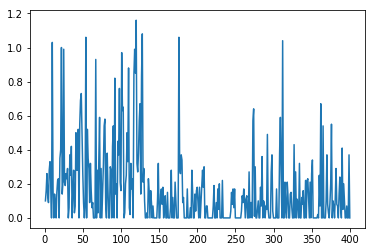

In [15]:
# plot of rewards

import matplotlib.pyplot as plt

plt.plot(range(1,len(scores_history) +1 ), scores_history)

#plt.plot(range(1,len(scores) +1 ), scores)



In [22]:
import importlib
importlib.reload(agent)

<module 'agent' from '/home/workspace/agent.py'>

In [ ]:
%autoreload 1

When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 